# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

## Step 2: Load the given data that we will model

In [2]:
df = pd.read_csv('c02_dataset_4.csv')

df.head(10)

,X,y
0,16.24,408.73640
1,-6.12,158.21160
2,-5.28,64.68760
3,-10.73,195.50435
4,8.65,34.01875
5,-23.02,732.25060
6,17.45,592.88875
7,-7.61,-34.13685
8,3.19,0.80915
9,-2.49,4.84515


Seperate out the input m(X) and the target (y)

In [3]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

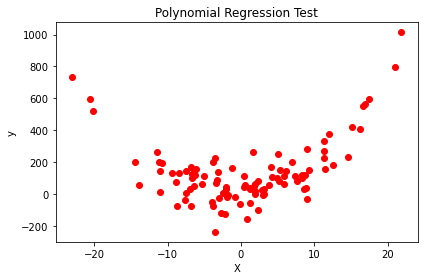

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [5]:
lin_reg1=LinearRegression().fit(X,y)

## Step 5: Analyze the resulting model's performance

Visualize the linear regression model results

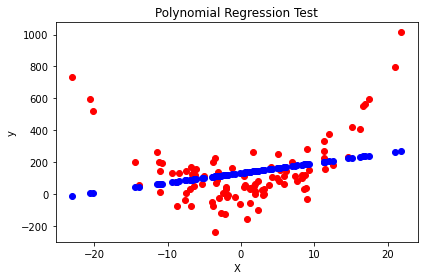

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [7]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [8]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 132.71377075579954 + 6.212103885460402x
R^2: 0.07592905806752626


... using fstring formatting, we can display these values as follows...

In [9]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 132.71 + 6.21x
R^2: 0.076


## Step 6: Try another model (in this case, a second order polynomial)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [10]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

Fit this model to the polynomial features...

In [11]:
lin_reg2=LinearRegression().fit(X_poly,y)

Explore the results visually...

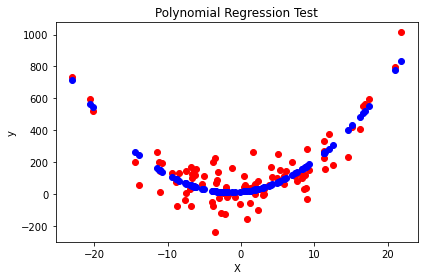

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

Look at what the 'hidden model' is that we have identified...

In [13]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = 14.49 + 4.44x + 1.52x^2
R^2: 0.78


### When we decrease the number of observations generated, it is more likely to have an adverse effect on the R-squared value, because the smaller sample size can lead to a less representative dataset and make it more difficult for the model to capture the true underlying patterns in the data accurately. In general, if the original dataset was relatively large, the decrease in the number of observations may not have a significant impact on the R-squared value. However, if the original dataset was small, decreasing the number of observations can lead to a more significant decrease in the R-squared value.

### Here in our case, i dont see much of a difference in R squared values, even if we decrease the sample size from 1000 to 500,100. When we decreased it to 500 from 1000, it changed from 83 % to 82 % and when decreased to 100 from 1000, the R squared value changed from 83% to 78%. 